# Reto| Predicción de Contigencias Ambientales en el Área Metropolitana de la Ciudad de Monterrey

**Objetivo**:
Con el desarrollo del reto integrarás todos los conocimientos adquiridos, cumpliendo los siguientes objetivos:

- Descubrir relaciones entre las variables dependientes e independientes para crear modelos predictivos usando correlación.

- Aplicar modelos predictivos de machine learning y evalúa los resultados.


In [89]:
# Montando Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
from pyspark import SparkContext
from pyspark.sql import SparkSession,SQLContext

# Creando SparkSession
spark = SparkSession.builder.appName('Reto').getOrCreate()

# Contextos adicionales
sc = spark.sparkContext
sqlcontext = SQLContext(sc)

/usr/local/lib/python3.12/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [91]:
# Leyendo csv
path_csv = '/content/drive/MyDrive/Colab/MonterreyPollutionData2.csv'
dataset = spark.read.csv(path_csv, header=True, inferSchema=True)
dataset.show(10)

+---------+-----+---+-------+-------+----+----+----+----+----+---+----+-----+-----+-----+---+-----+----+---+---+
|     Date|Month|Day|DayWeek|WeekDay|Hour|  CO|  NO| NO2| NOX| O3|PM10|PM2.5|  PRS|RAINF| RH|   SR|TOUT|WSR|WDV|
+---------+-----+---+-------+-------+----+----+----+----+----+---+----+-----+-----+-----+---+-----+----+---+---+
|01-ene-15|    1|  1|    jue|      5|   1|2.51|10.2|12.9|23.1| 10| 139|   80|725.4| 0.01| 96|  0.0|3.91|7.2|344|
|01-ene-15|    1|  1|    jue|      5|   2|2.41| 9.2|11.6|20.8|  7|  42|   29|725.0| 0.02| 96|  0.0|3.81|6.3|341|
|01-ene-15|    1|  1|    jue|      5|   3|2.39| 8.1|11.8|19.9|  7|  23|    9|724.4|  0.0| 96|  0.0|3.85|5.2|346|
|01-ene-15|    1|  1|    jue|      5|   5|2.26| 5.3| 8.9|14.2|  7|  23|   14|724.0| 0.01| 96|  0.0|3.79|5.6|336|
|01-ene-15|    1|  1|    jue|      5|   8|2.25| 7.2|10.2|17.4|  5|  15|    8|724.3|  0.0| 96|0.023|3.93|4.8|354|
|01-ene-15|    1|  1|    jue|      5|   9|2.21| 5.8| 8.2|14.0|  7|  16|    6|724.3|  0.0| 96|0.0

In [92]:
dataset.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- DayWeek: string (nullable = true)
 |-- WeekDay: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- CO: double (nullable = true)
 |-- NO: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- O3: integer (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- PM2.5: integer (nullable = true)
 |-- PRS: double (nullable = true)
 |-- RAINF: double (nullable = true)
 |-- RH: integer (nullable = true)
 |-- SR: double (nullable = true)
 |-- TOUT: double (nullable = true)
 |-- WSR: double (nullable = true)
 |-- WDV: integer (nullable = true)



In [93]:
# Renombrando columna PM2.5
dataset = dataset.withColumnRenamed('PM2.5', 'PM2_5')
dataset.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- DayWeek: string (nullable = true)
 |-- WeekDay: integer (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- CO: double (nullable = true)
 |-- NO: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- O3: integer (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- PM2_5: integer (nullable = true)
 |-- PRS: double (nullable = true)
 |-- RAINF: double (nullable = true)
 |-- RH: integer (nullable = true)
 |-- SR: double (nullable = true)
 |-- TOUT: double (nullable = true)
 |-- WSR: double (nullable = true)
 |-- WDV: integer (nullable = true)



In [94]:
# Filtrando columnas numéricas
from pyspark.sql.types import NumericType
num_cols = [
    f.name for f in dataset.schema.fields if isinstance(f.dataType, NumericType)
    ]
print(num_cols)


['Month', 'Day', 'WeekDay', 'Hour', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2_5', 'PRS', 'RAINF', 'RH', 'SR', 'TOUT', 'WSR', 'WDV']


In [95]:
# Dataset final
df = dataset.select(num_cols)

In [96]:
# Resumen del DataFrame
df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+-----------------+-------------------+-----------------+------------------+------------------+
|summary|             Month|              Day|           WeekDay|              Hour|                CO|                NO|               NO2|               NOX|                O3|             PM10|             PM2_5|               PRS|               RAINF|               RH|                 SR|             TOUT|               WSR|               WDV|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+-----------------+-------------------+----

In [97]:
df.columns

['Month',
 'Day',
 'WeekDay',
 'Hour',
 'CO',
 'NO',
 'NO2',
 'NOX',
 'O3',
 'PM10',
 'PM2_5',
 'PRS',
 'RAINF',
 'RH',
 'SR',
 'TOUT',
 'WSR',
 'WDV']

## 1. Realizar un análisis de correlación y establece que variables ambientales o de tiempo afecta la concetración de contaminantes O3 y PM2.

### 1.1 Análisis de Correlación

In [98]:
# Variables objetivo
target_vars = ['O3','PM2_5']

correlations = {}
for target in target_vars:
    corr_dict = {}
    for col in num_cols:
        if col !=target:
            corr = df.stat.corr(target,col)
            corr_dict[col] = corr
    correlations[target] = corr_dict

In [99]:
import pandas as pd
# Resultados obtenidos
for target in correlations:
    print(f'\n Correlaciones con {target}:')
    corr_df = pd.DataFrame(list(correlations[target].items()),
                           columns=['Variable','Correlación'])
    corr_df['Correlación'] = corr_df['Correlación']
    corr_df = corr_df.sort_values('Correlación',ascending=False)
    print(corr_df.head) # top de 10 variables más influyentes


 Correlaciones con O3:
<bound method NDFrame.head of    Variable  Correlación
13       SR     0.691927
14     TOUT     0.527154
15      WSR     0.466254
3      Hour     0.228381
0     Month     0.213890
1       Day     0.089457
2   WeekDay     0.015993
9     PM2_5    -0.008811
11    RAINF    -0.030142
8      PM10    -0.046893
4        CO    -0.196441
16      WDV    -0.198798
10      PRS    -0.219732
5        NO    -0.275251
6       NO2    -0.302997
7       NOX    -0.316941
12       RH    -0.655588>

 Correlaciones con PM2_5:
<bound method NDFrame.head of    Variable  Correlación
9      PM10     0.511989
6       NO2     0.302022
7       NOX     0.284654
5        NO     0.232708
4        CO     0.217616
3      Hour     0.097884
14     TOUT     0.083703
12       RH     0.036154
11    RAINF     0.030746
2   WeekDay     0.016755
8        O3    -0.008811
1       Day    -0.013651
16      WDV    -0.032373
13       SR    -0.037306
0     Month    -0.057530
15      WSR    -0.071178
10      PRS  

Como se puede ver en los resultados de correlación entre variables, las más influyentes para la generación de **03** son:
1. SR : Radiación Solar
2. TOUT: Temperatura
3. WSR: Velocidad del Viento
4. Hour: Hora
5. Month: Mes
6. RH: Humedad Relativa
7. NOX: Suma de NO y NO2
8. NO2: Dióxido de Nitrógeno
9. NO: Monóxido de Nitrógeno
10. PRS: Presión

Las variables más influyentes para la generación de PM2.5 son:
1. Partículas menores 10 microns
2. NO2: Dióxido de Nitrógeno
3. NOX: Suma de NO y NO2
4. NO: Monóxido de Nitrógeno
5. CO: Mónoxido de Carbono
6. PRS: Presión
7. Hour: Hora
8. Tout: Temperatura
9. WSR: Velocidad del Viento
10. Month: Mes

### 1.2 Gráficos de Dispersión

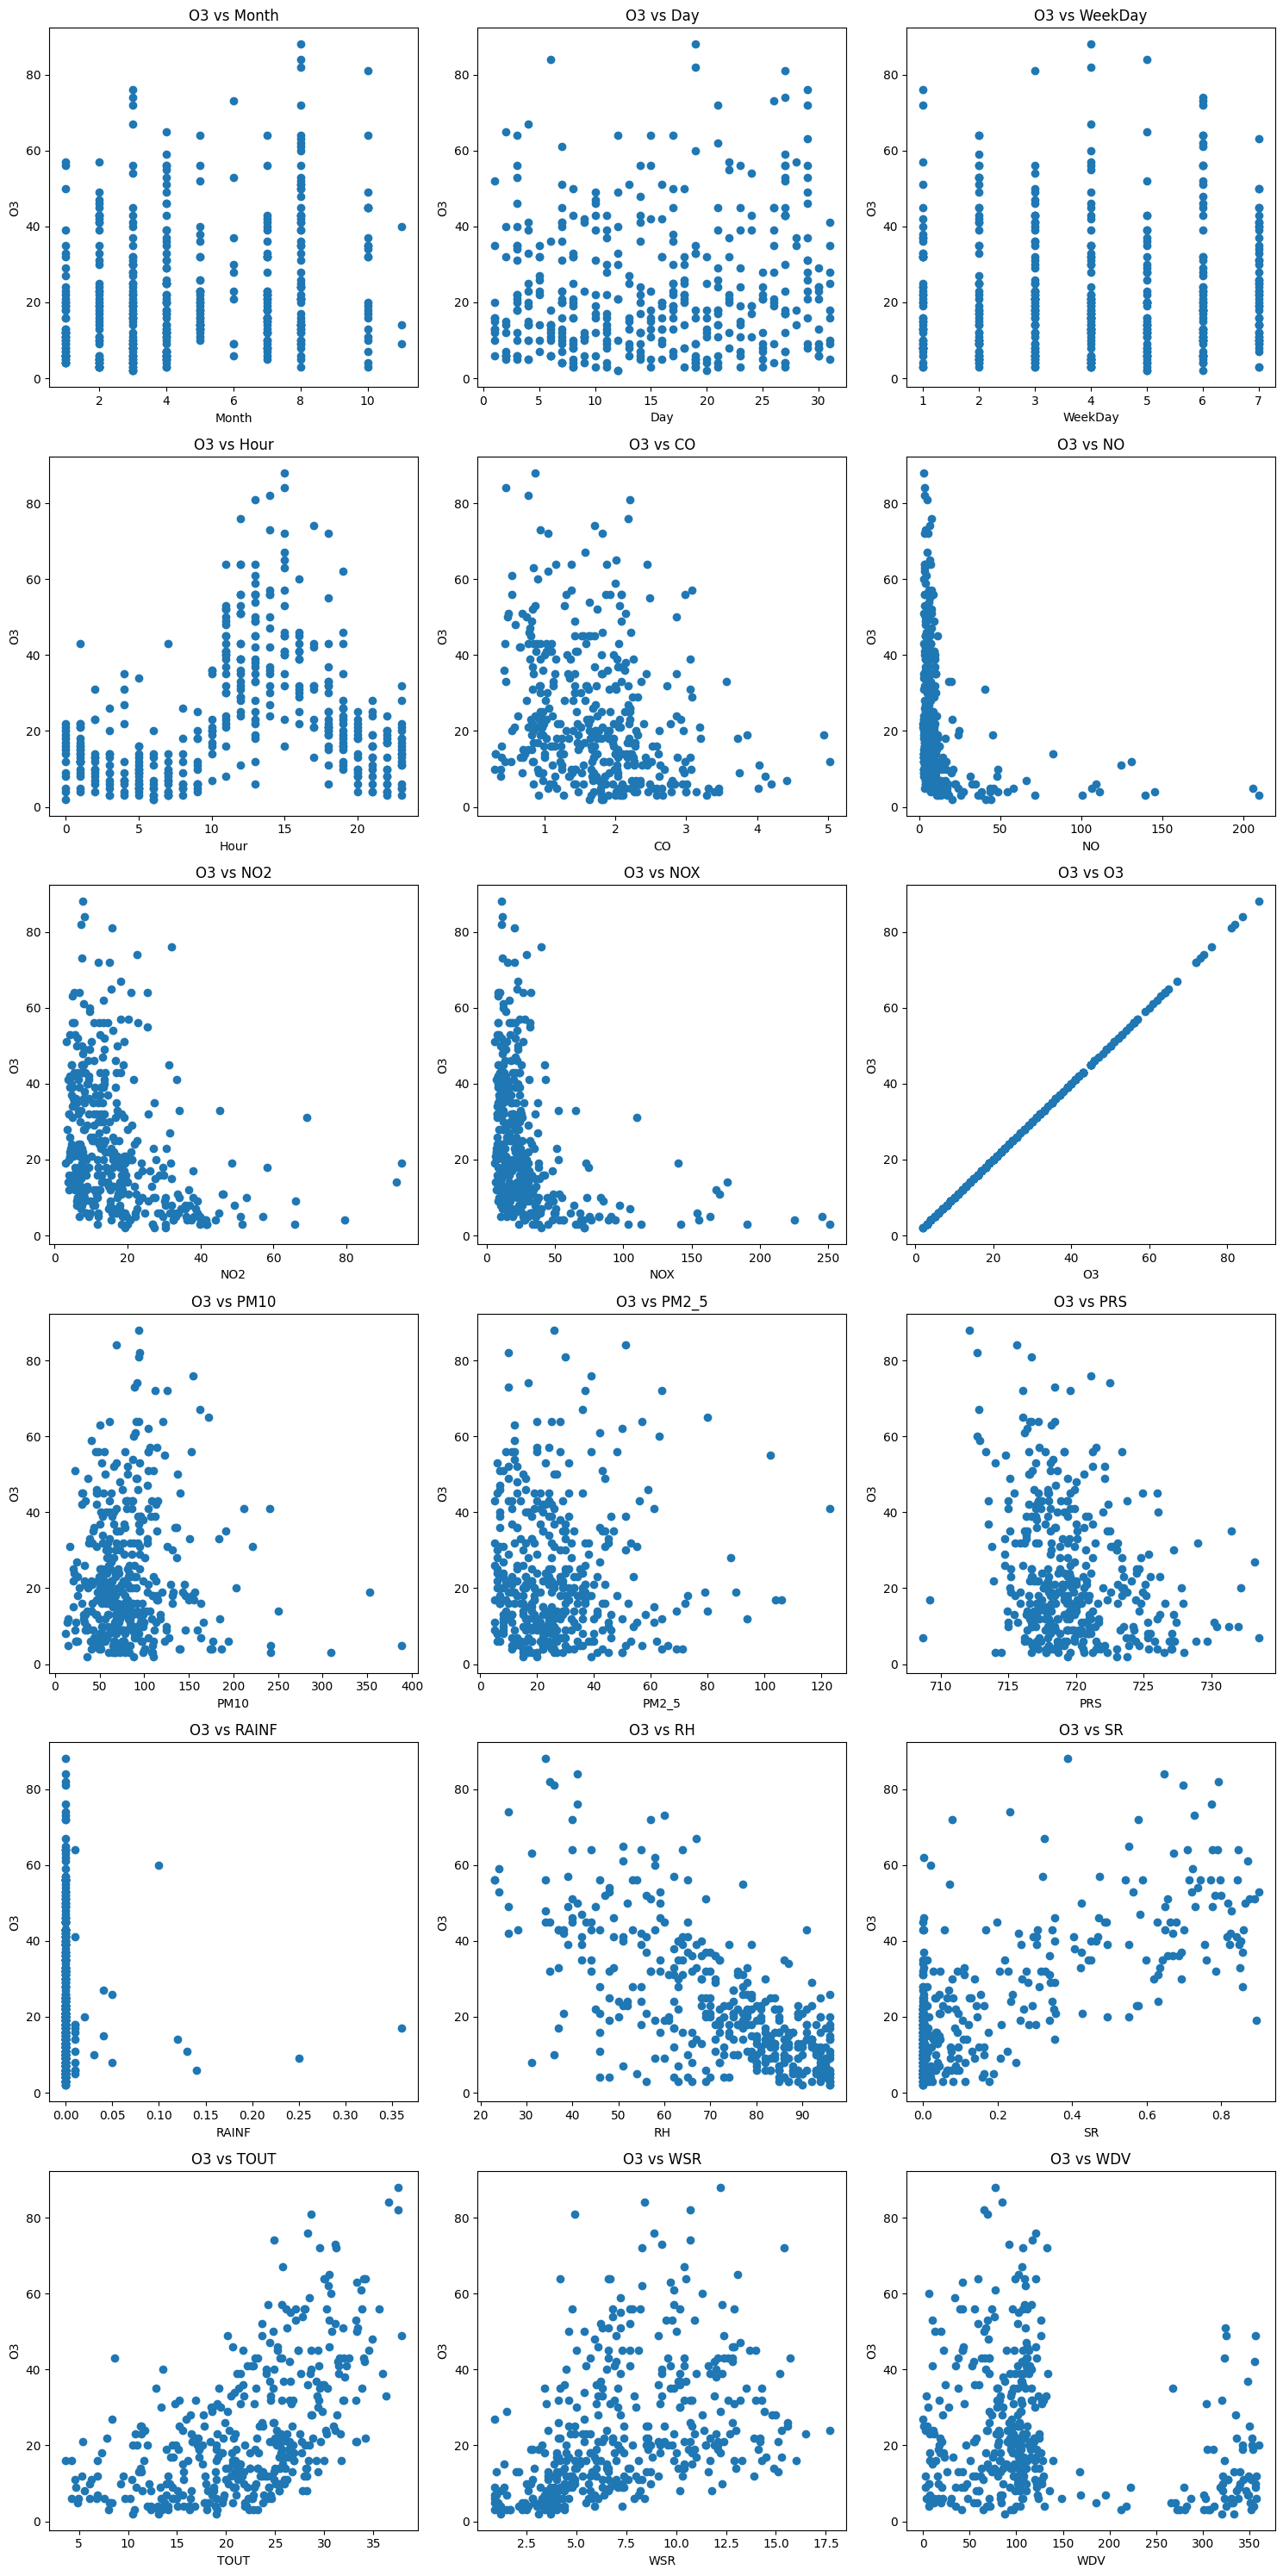

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Pasando a pandas con muestro
df_pandas = df.sample(fraction=0.1,seed = 42).toPandas()

# Gráficas de dispersión para O3
target = 'O3'
features = [c for c in df_pandas.columns]

# Cuadrícula
n_cols = 3
n_rows = math.ceil(len(features)/n_cols)

fig,axes = plt.subplots(n_rows,n_cols,figsize=(15,5*n_rows))

for i,feature in enumerate(features):
    r,c = divmod(i,n_cols)
    axes[r,c].scatter(df_pandas[feature],df_pandas[target])
    axes[r,c].set_xlabel(feature)
    axes[r,c].set_ylabel(target)
    axes[r,c].set_title(f'{target} vs {feature}')

# Quitar ejes vacios
for j in range(i+1, n_rows*n_cols):
    r,c = divmod(j,n_cols)
    axes[r,c].axis('off')

plt.tight_layout()
plt.show()

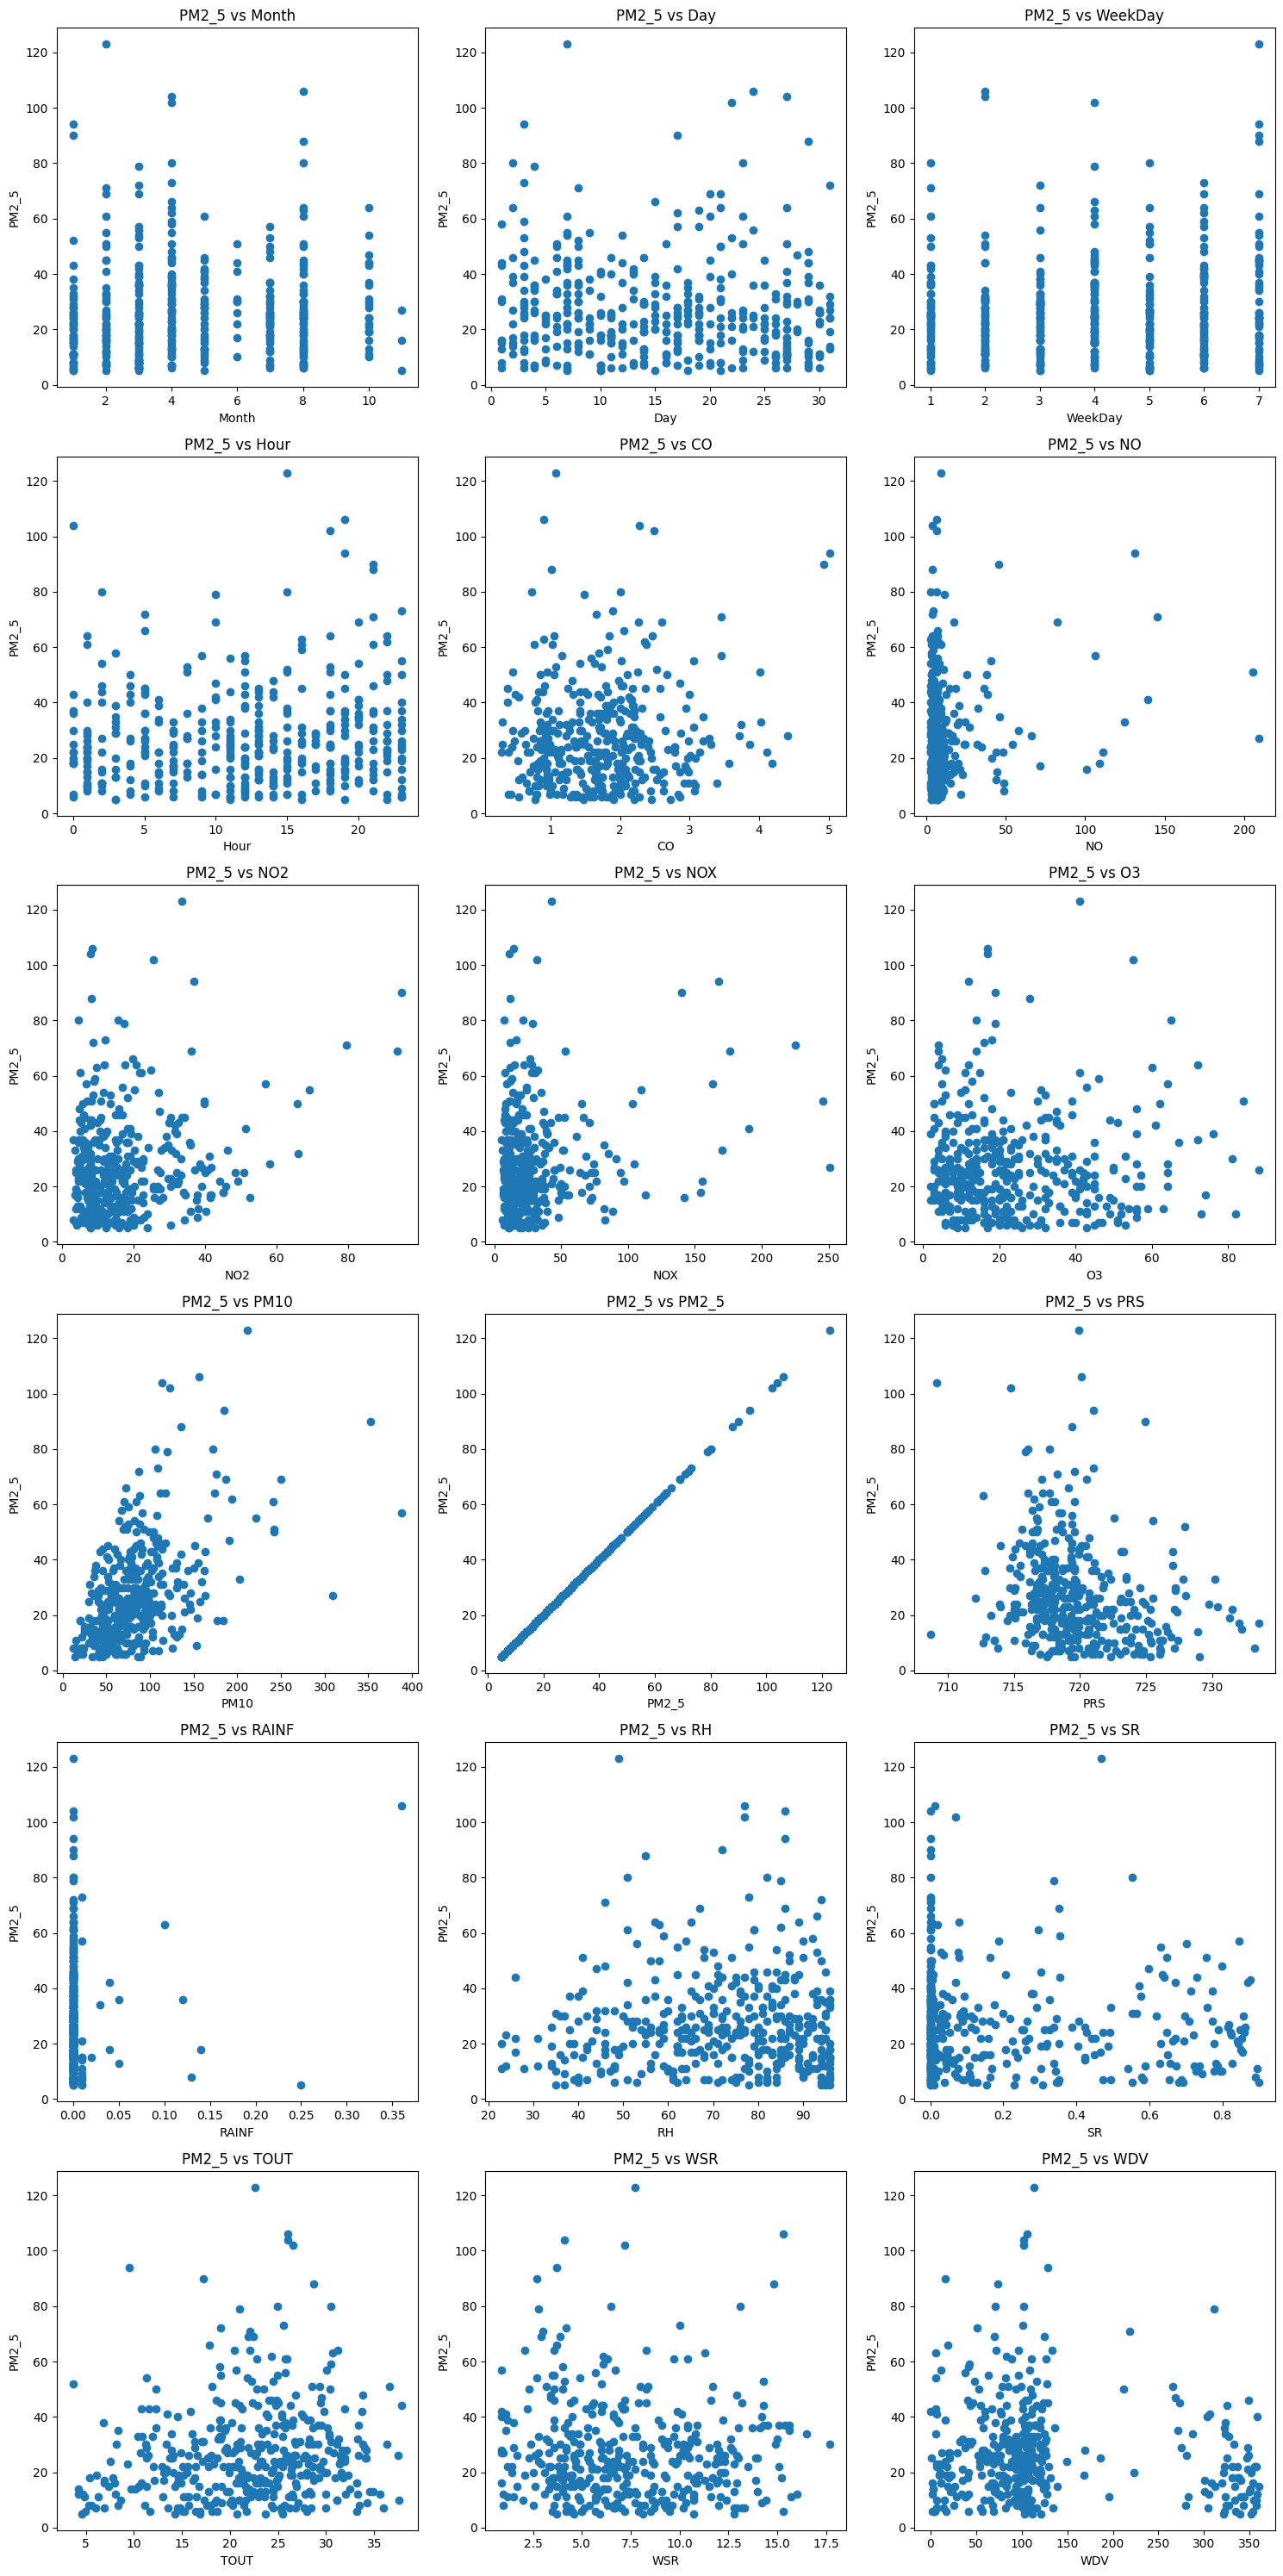

In [101]:
# Gráficas de dispersión para O3
target = 'PM2_5'
features = [c for c in df_pandas.columns]

# Cuadrícula
n_cols = 3
n_rows = math.ceil(len(features)/n_cols)

fig,axes = plt.subplots(n_rows,n_cols,figsize=(15,5*n_rows))

for i,feature in enumerate(features):
    r,c = divmod(i,n_cols)
    axes[r,c].scatter(df_pandas[feature],df_pandas[target])
    axes[r,c].set_xlabel(feature)
    axes[r,c].set_ylabel(target)
    axes[r,c].set_title(f'{target} vs {feature}')

# Quitar ejes vacios
for j in range(i+1, n_rows*n_cols):
    r,c = divmod(j,n_cols)
    axes[r,c].axis('off')

plt.tight_layout()
plt.show()

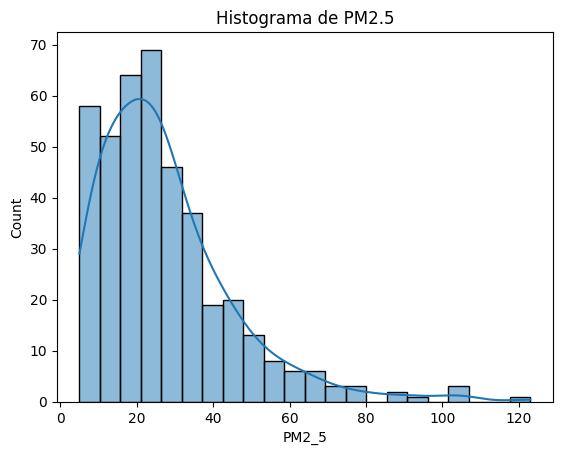

In [102]:
# Histograma para PM2.5
sns.histplot(df_pandas['PM2_5'],kde=True)
plt.title('Histograma de PM2.5')
plt.show()

## 2. Crea modelos de correlación para predecir estos contaminantes con la menor cantidad de variabes atributo posible

### 2.1 Modelo para O3


#### 2.1.1 Regresión Lineal

In [103]:
# Variables con mayor correlación
features_col_o3 = ['SR','RH','TOUT','WSR','NOX','NO2','NO','Hour','PRS','Month']

# Assembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols = features_col_o3,outputCol='features')
data= assembler.transform(df).select('features','O3')

# Separación de datos de entrenamiento y prueba
train_data, test_data = data.randomSplit([0.8,0.2],seed=42)

In [104]:
from pyspark.ml.regression import LinearRegression

# Definiendo el Modelo
lr = LinearRegression(featuresCol='features',
                      labelCol='O3',
)
lr_model = lr.fit(train_data)

# Mostrar predicciones
predictions = lr_model.transform(test_data)
lr_predictions_O3 = predictions.select('prediction','O3','features')
lr_predictions_O3.show(5)

+------------------+---+--------------------+
|        prediction| O3|            features|
+------------------+---+--------------------+
| 15.47654713079578|  9|[0.0,33.0,16.18,1...|
|15.169964449996257|  9|[0.0,34.0,16.1,2....|
| 33.88431572085051| 40|[0.0,35.0,25.31,8...|
|19.592552874396404| 16|[0.0,37.0,21.5,7....|
| 32.77973010414826| 35|[0.0,39.0,31.56,9...|
+------------------+---+--------------------+
only showing top 5 rows



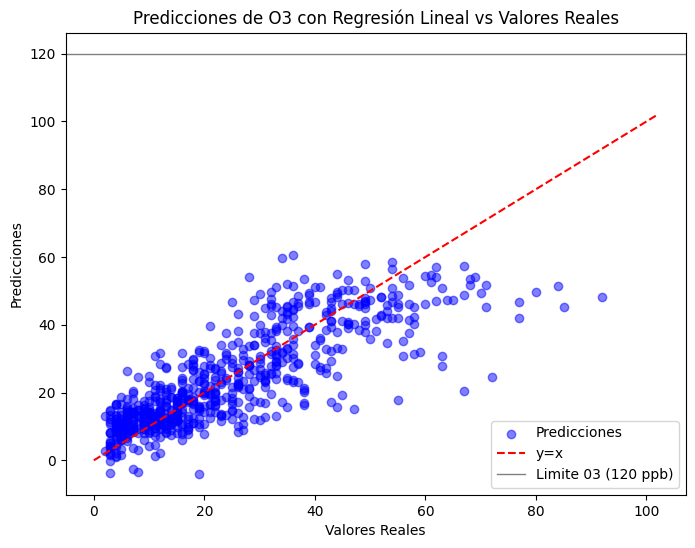

In [105]:
df_plot = lr_predictions_O3.toPandas()

plt.figure(figsize=(8,6))
plt.scatter(
    df_plot['O3'],df_plot['prediction'],color='blue',
    alpha=0.5,label='Predicciones')
plt.plot(
    [0,max(df_plot['O3'])+10],[0,max(df_plot['O3'])+10],
    color='red',linestyle='--',label='y=x')
plt.axhline(y=120,color='grey',
            linestyle='-',linewidth=1,label='Limite 03 (120 ppb)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones de O3 con Regresión Lineal vs Valores Reales')
plt.legend()
plt.show()

#### 2.1.2 Random Forest Regressor

In [106]:
from pyspark.ml.regression import RandomForestRegressor
# Variables con mayor correlación
features_col_o3 = ['SR','RH','TOUT','WSR','NOX','NO2','NO','Hour','PRS','Month']

# Assembler
assembler = VectorAssembler(inputCols = features_col_o3,outputCol='features')
data = assembler.transform(df).select('features','O3')

# Separación de datos de entrenamiento y prueba
train_data, test_data = data.randomSplit([0.8,0.2],seed=42)

rfr = RandomForestRegressor(
    featuresCol='features',
    labelCol='O3',
    numTrees=100,
    seed=42)
rfr_model = rfr.fit(train_data)

# Predicciones
predictions = rfr_model.transform(test_data)
rfr_pred_o3 = predictions.select('prediction','O3','features')
rfr_pred_o3.show(5)


+------------------+---+--------------------+
|        prediction| O3|            features|
+------------------+---+--------------------+
| 9.271974394875038|  9|[0.0,33.0,16.18,1...|
| 9.271974394875038|  9|[0.0,34.0,16.1,2....|
| 24.70226936271757| 40|[0.0,35.0,25.31,8...|
|15.847662185004506| 16|[0.0,37.0,21.5,7....|
|26.600150900584623| 35|[0.0,39.0,31.56,9...|
+------------------+---+--------------------+
only showing top 5 rows



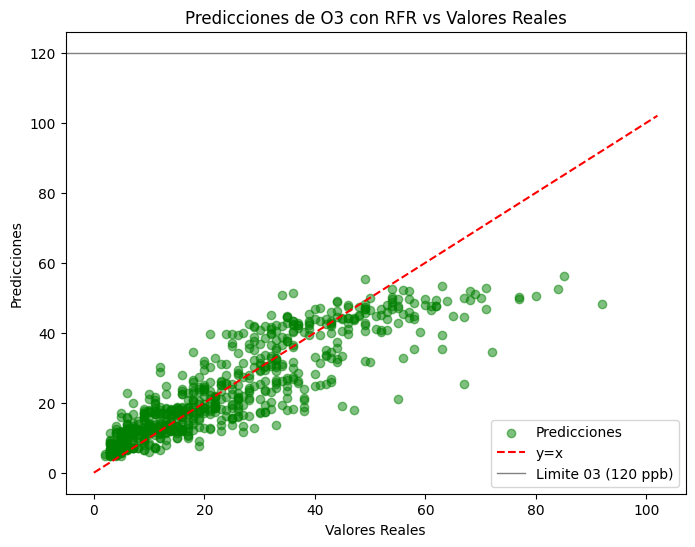

In [107]:
df_plot = rfr_pred_o3.toPandas()

plt.figure(figsize=(8,6))
plt.scatter(
    df_plot['O3'],df_plot['prediction'],color='green',
    alpha=0.5,label='Predicciones')
plt.plot(
    [0,max(df_plot['O3'])+10],[0,max(df_plot['O3'])+10],
    color='red',linestyle='--',label='y=x')
plt.axhline(y=120,color='grey',
            linestyle='-',linewidth=1,label='Limite 03 (120 ppb)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones de O3 con RFR vs Valores Reales')
plt.legend()
plt.show()

In [108]:
# Importancia de features
importances = list(rfr_model.featureImportances.toArray())
# Pasar a DF para visualizar
feat_imp = pd.DataFrame({
    'Feature': features_col_o3,
    'Importance': importances
}).sort_values(by='Importance',ascending=False)
feat_imp

,Feature,Importance
0,SR,0.346361
1,RH,0.233122
7,Hour,0.103793
2,TOUT,0.095121
3,WSR,0.088509
6,NO,0.067674
4,NOX,0.032126
5,NO2,0.022928
9,Month,0.005703
8,PRS,0.004664


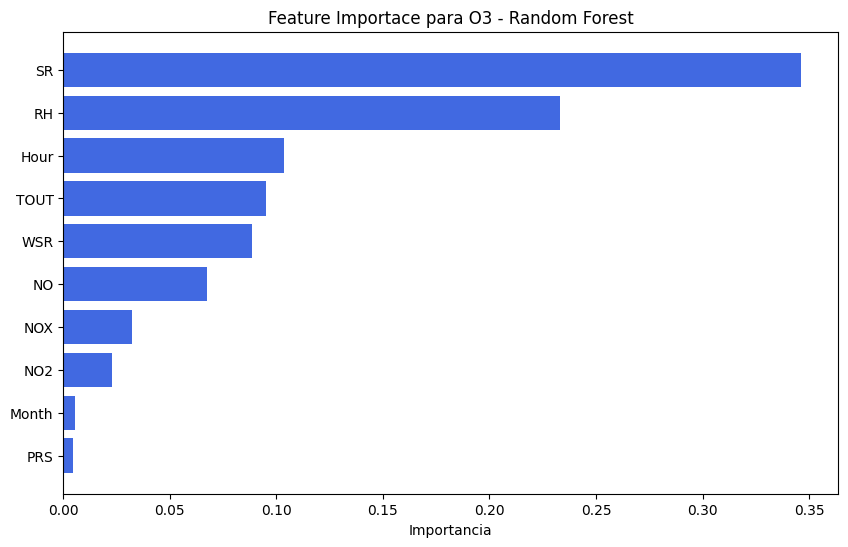

In [109]:
# Gráfica de barras de feature importances
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'],feat_imp['Importance'],color = 'royalblue')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.title('Feature Importace para O3 - Random Forest')
plt.show()

De acuerdo con lo anterior, las variables con más importancia en el modelo de Random Forest Regressor para predecir O3 son:
1. Radiación Solar
2. Humedad Relativa
3. Hora
4. Temperatura
5. Velocidad del Viento
6. Monóxido de Nitrógeno

#### 2.1.3 XGBRegressor

In [110]:
from xgboost.spark import SparkXGBRegressor
# Variables con mayor correlación
features_col = ['SR','RH','TOUT','WSR','NOX','NO2','NO','Hour','PRS','Month']

# Assembler
assembler = VectorAssembler(inputCols = features_col,outputCol='features')
data = assembler.transform(df).select('features','O3')

# Separación de datos de entrenamiento y prueba
train_data, test_data = data.randomSplit([0.8,0.2],seed=42)

xgb = SparkXGBRegressor(
    features_col='features',
    label_col='O3',
    num_workers=2,
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    seed=42)
xgb_model = xgb.fit(train_data)

# Predicciones
predictions = xgb_model.transform(test_data)
xgb_pred_o3 = predictions.select('prediction','O3','features')
xgb_pred_o3.show(5)

INFO:XGBoost-PySpark:Running xgboost-3.0.5 on 2 workers with
	booster params: {'objective': 'reg:squarederror', 'device': 'cpu', 'learning_rate': 0.1, 'max_depth': 5, 'seed': 42, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!


+------------------+---+--------------------+
|        prediction| O3|            features|
+------------------+---+--------------------+
| 8.683090209960938|  9|[0.0,33.0,16.18,1...|
|7.6264238357543945|  9|[0.0,34.0,16.1,2....|
|32.828758239746094| 40|[0.0,35.0,25.31,8...|
|17.813451766967773| 16|[0.0,37.0,21.5,7....|
|33.018341064453125| 35|[0.0,39.0,31.56,9...|
+------------------+---+--------------------+
only showing top 5 rows



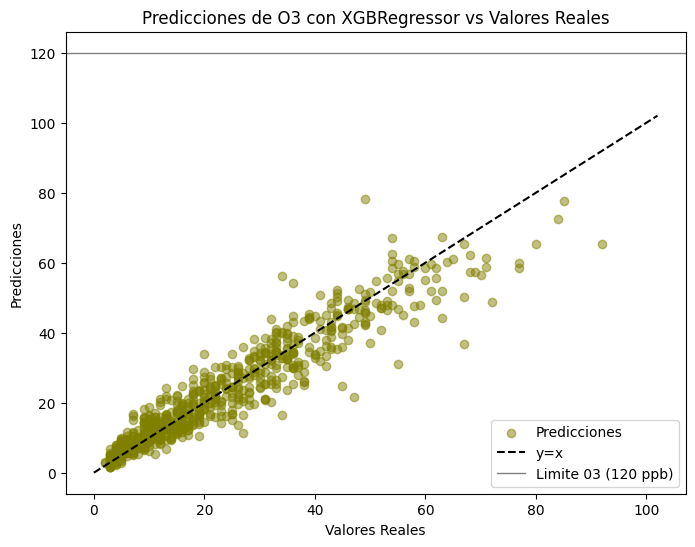

In [111]:
df_plot = xgb_pred_o3.toPandas()

plt.figure(figsize=(8,6))
plt.scatter(
    df_plot['O3'],df_plot['prediction'],color='olive',
    alpha=0.5,label='Predicciones')
plt.plot(
    [0,max(df_plot['O3'])+10],[0,max(df_plot['O3'])+10],
    color='black',linestyle='--',label='y=x')
plt.axhline(y=120,color='grey',
            linestyle='-',linewidth=1,label='Limite 03 (120 ppb)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones de O3 con XGBRegressor vs Valores Reales')
plt.legend()
plt.show()

In [112]:
# Feature Importance
from pyspark.ml import Pipeline
# Variables con mayor correlación
features_col = ['SR','RH','TOUT','WSR','NOX','NO2','NO','Hour','PRS','Month']

# Assembler
assembler = VectorAssembler(inputCols = features_col,outputCol='features')
# Modelo
xgb = SparkXGBRegressor(
    features_col='features',
    label_col='O3',
    num_workers=2,
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    seed=42)

# Pipeline
pipeline = Pipeline(stages=[assembler, xgb])

# Train/est del df original
train_data, test_data = df.randomSplit([0.8,0.2])

# Entrenar
xgb_model = pipeline.fit(train_data)

# Booster
booster = xgb_model.stages[-1].get_booster()

# Obtener importancia
feat_imp_xgb = booster.get_score(importance_type='weight')

print(feat_imp_xgb)

INFO:XGBoost-PySpark:Running xgboost-3.0.5 on 2 workers with
	booster params: {'objective': 'reg:squarederror', 'device': 'cpu', 'learning_rate': 0.1, 'max_depth': 5, 'seed': 42, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!


{'f0': 281.0, 'f1': 339.0, 'f2': 367.0, 'f3': 282.0, 'f4': 170.0, 'f5': 233.0, 'f6': 375.0, 'f7': 228.0, 'f8': 216.0, 'f9': 158.0}


In [113]:
# Diccionario que mapea los índices a los nombres de las característiccas
index_to_feature = {f'f{i}': feature for i, feature in enumerate(features_col)}

# Mapear puntuaciones de importancia a los nombres de las característias
feat_imp_named = {index_to_feature[k]: v for k,v in feat_imp_xgb.items()}

# Ordenar por importancia
sorted_feat_imp = sorted(feat_imp_named.items(), key=lambda x: x[1], reverse=True)
sorted_feat_imp_df = pd.DataFrame(sorted_feat_imp,columns=['Feature','Importance'])
sorted_feat_imp_df

,Feature,Importance
0,NO,375.0
1,TOUT,367.0
2,RH,339.0
3,WSR,282.0
4,SR,281.0
5,NO2,233.0
6,Hour,228.0
7,PRS,216.0
8,NOX,170.0
9,Month,158.0


/tmp/ipython-input-211733266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


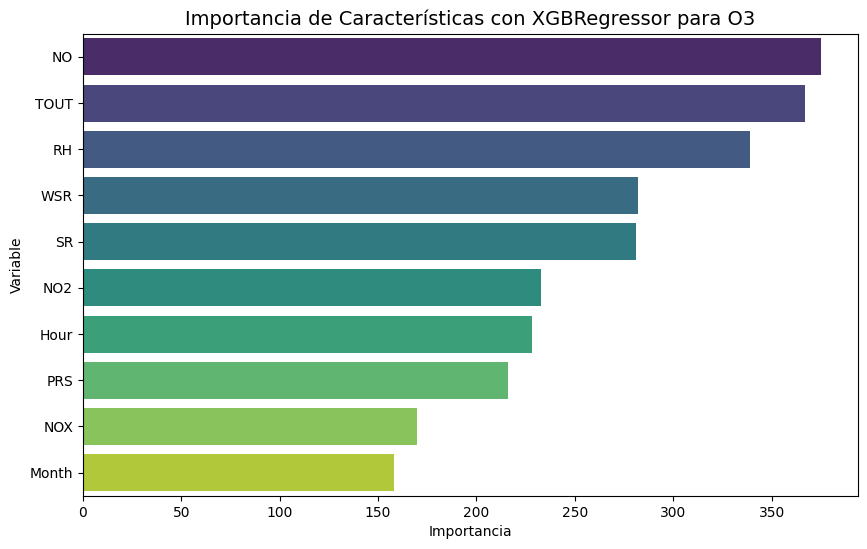

In [114]:
# Graficar Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(
    data = sorted_feat_imp_df,
    x = 'Importance',
    y = 'Feature',
    palette = 'viridis'
)

plt.title('Importancia de Características con XGBRegressor para O3',fontsize=14)
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

Por lo tanto, las variables más importantes para la predicción de O3 para el modelo de XGBRegressor es:
1. Monóxido de Nitrógeno
2. Temperatura
3. Humedad Relativa
4. Radiación Solar
5. Dióxido de Nitrógeno
6. Velocidad del Viento

### 2.2 Modelo PM2.5


#### 2.2.1 Regresión Lineal

In [115]:
# Variables con mayor correlación
features_col =  ['Month','Day','WeekDay','Hour','CO','NO','NO2','NOX','O3',
                 'PM10','PRS','RAINF','RH','SR','TOUT', 'WSR','WDV']

# Assembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols = features_col,outputCol='features')
data= assembler.transform(df).select('features','PM2_5')

# Separación de datos de entrenamiento y prueba
train_data, test_data = data.randomSplit([0.8,0.2],seed=42)

# Definiendo el Modelo
lr = LinearRegression(featuresCol='features',
                      labelCol='PM2_5',
)
lr_model = lr.fit(train_data)

# Mostrar predicciones
predictions = lr_model.transform(test_data)
lr_predictions_pm25 = predictions.select('prediction','PM2_5')
lr_predictions_pm25.show(5)

+------------------+-----+
|        prediction|PM2_5|
+------------------+-----+
|10.369634595497928|    9|
|14.222197351302839|   17|
| 17.94195770306351|   19|
|22.567431434280138|   33|
|11.944238700390201|   12|
+------------------+-----+
only showing top 5 rows



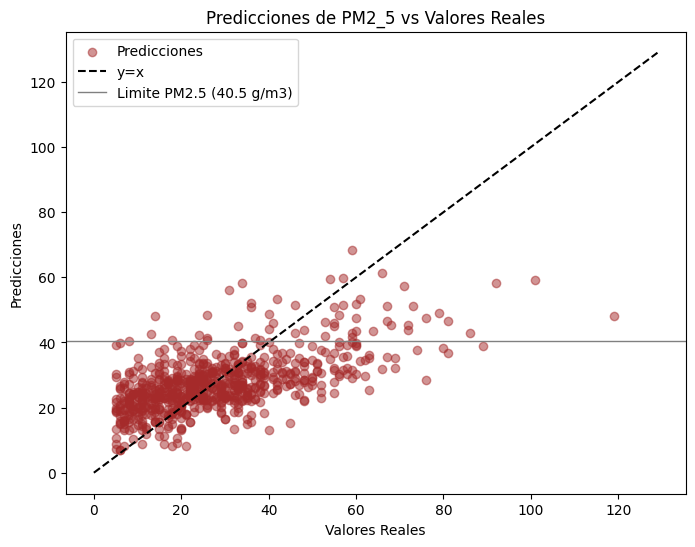

In [116]:
df_plot = lr_predictions_pm25.toPandas()

plt.figure(figsize=(8,6))
plt.scatter(
    df_plot['PM2_5'],df_plot['prediction'],color='brown',
    alpha=0.5,label='Predicciones')
plt.plot(
    [0,max(df_plot['PM2_5'])+10],[0,max(df_plot['PM2_5'])+10],
    color='black',linestyle='--',label='y=x')
plt.axhline(y=40.5,color='grey',
            linestyle='-',linewidth=1,label='Limite PM2.5 (40.5 g/m3)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones de PM2_5 vs Valores Reales')
plt.legend()
plt.show()

#### 2.2.2 Random Forest Regressor

Se van a incluir **lag features** de PM2.5 y PM10 para capturar la dependencia temporal de la contaminación, la concentración de estas variables se ve influenciada por los valores de días anteriores debido a la acumulación y dispersión de partículas en el ambiente.
Así mismo, se incorporarán las proporciones de **PM10/PM2.5** y **NO2/NO** para reflejar la composición del material particulado y los procesos químicos del aire.
Estas transformaciones ayudan al modelo a mejorar la predicción sin añadir más variables.

In [117]:
# Creación de lag features
from pyspark.sql.window import Window
from pyspark.sql.functions import col, concat_ws, lag
from pyspark.sql.functions import monotonically_increasing_id

# Crear una columna artificial "día-mes-hora"

df = df.withColumn('DateOrder',
                   concat_ws('-',col('Day'),col('Month'),col('Hour')))

# Índice numérico para ordenar
df = df.withColumn('time_index',monotonically_increasing_id())

# Window para lags
w = Window.orderBy('time_index')

# Creando lag features
for lag_i in range(1,6):
    df = df.withColumn(f'PM2_5_lag{lag_i}',lag('PM2_5',lag_i).over(w))
    df = df.withColumn(f'PM10_lag{lag_i}',lag('PM10',lag_i).over(w))

# Interacciones simples
df = df.withColumn("PM10_PM2_5_ratio", col("PM10") / col("PM2_5"))
df = df.withColumn("NO2_NOX_ratio", col("NO2") / col("NOX"))

# Eliminando columnas que no tienen lag
df = df.na.drop()

In [118]:
# Variables con mayor correlación
features_col =  ['Month','Day','WeekDay','Hour','CO','NO','NO2','NOX','O3',
                 'PM10','PRS','RAINF','RH','SR','TOUT', 'WSR','WDV']


# Agregar lag features e interacciones
for lag_i in range(1, 6):
    features_col += [f"PM2_5_lag{lag_i}", f"PM10_lag{lag_i}"]

features_col += ["PM10_PM2_5_ratio", "NO2_NOX_ratio"]
# Assembler
assembler = VectorAssembler(inputCols = features_col,outputCol='features')
data = assembler.transform(df).select('features','PM2_5')

# Separación de datos de entrenamiento y prueba
train_data, test_data = data.randomSplit([0.8,0.2],seed=42)

rfr = RandomForestRegressor(
    featuresCol='features',
    labelCol='PM2_5',
    numTrees=200,
    maxDepth=10,
    minInstancesPerNode=2,
    seed=42)
rfr_model_pm25 = rfr.fit(train_data)

# Predicciones
predictions = rfr_model_pm25.transform(test_data)
rfr_pred_pm25 = predictions.select('prediction','PM2_5','features')
rfr_pred_pm25.show(5)

+------------------+-----+--------------------+
|        prediction|PM2_5|            features|
+------------------+-----+--------------------+
|16.889516585508886|   16|[1.0,1.0,5.0,13.0...|
| 32.19093621666584|   36|[1.0,1.0,5.0,17.0...|
| 32.60677830162416|   33|[1.0,1.0,5.0,19.0...|
|12.447385551922984|   11|[1.0,2.0,6.0,1.0,...|
|15.310357768000838|   14|[1.0,2.0,6.0,13.0...|
+------------------+-----+--------------------+
only showing top 5 rows



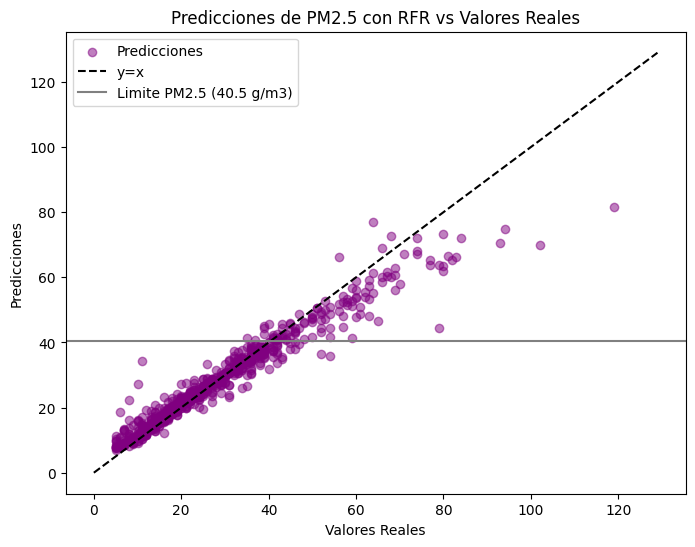

In [119]:
df_plot = rfr_pred_pm25.toPandas()

plt.figure(figsize=(8,6))
plt.scatter(
    df_plot['PM2_5'],df_plot['prediction'],color='purple',
    alpha=0.5,label='Predicciones')
plt.plot(
    [0,max(df_plot['PM2_5'])+10],[0,max(df_plot['PM2_5'])+10],
    color='black',linestyle='--',label='y=x')
plt.axhline(y=40.5,color='grey',
            linestyle='-',label='Limite PM2.5 (40.5 g/m3)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones de PM2.5 con RFR vs Valores Reales')
plt.legend()
plt.show()

In [120]:
# Importancia de features
importances = rfr_model_pm25.featureImportances.toArray().tolist()

# Pasar a DF para visualizar
feat_imp = pd.DataFrame({
    'Feature': features_col,
    'Importance': importances
}).sort_values(by='Importance',ascending=False)
feat_imp

,Feature,Importance
27,PM10_PM2_5_ratio,0.401321
9,PM10,0.254157
17,PM2_5_lag1,0.075882
18,PM10_lag1,0.069768
20,PM10_lag2,0.020951
6,NO2,0.020481
19,PM2_5_lag2,0.014664
7,NOX,0.012242
10,PRS,0.010067
14,TOUT,0.009450


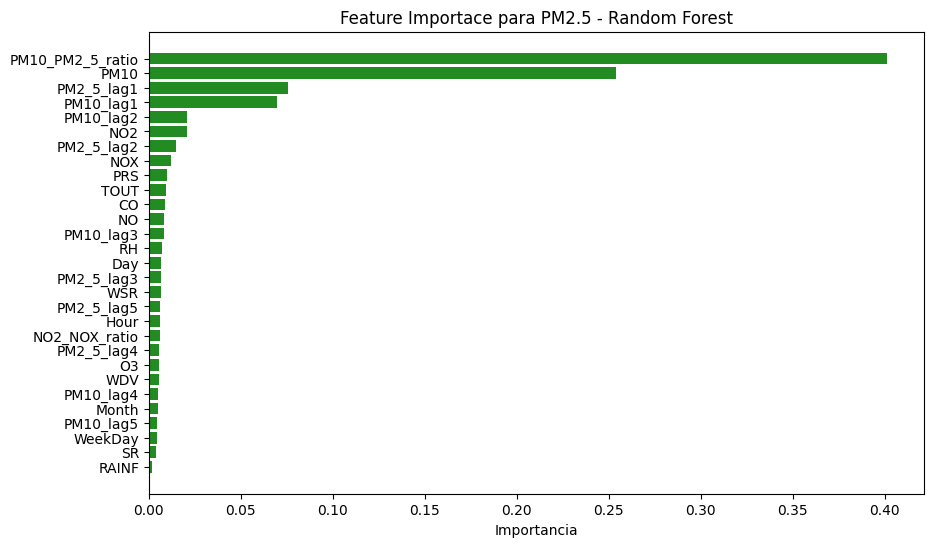

In [121]:
# Gráfica de barras de feature importances
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'],feat_imp['Importance'],color = 'forestgreen')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.title('Feature Importace para PM2.5 - Random Forest')
plt.show()

Por lo tanto, las variables con más importancia para el modelo de Random Forest Regresor para predecir las partículas PM2.5 son:
1. Proporción entre PM10 y PM2.5
2. PM10
3. Partículos PM2.5 del día anterior
4. Partículas PM10 del día anterior
5. Partículos PM10 de dos días antes
6. NO2


#### 2.2.3 XGBRegressor

In [122]:
# Variables
features_col =  ['Month','Day','WeekDay','Hour','CO','NO','NO2','NOX','O3',
                 'PM10','PRS','RAINF','RH','SR','TOUT', 'WSR','WDV']


# Agregar lag features e interacciones
for lag_i in range(1, 6):
    features_col += [f"PM2_5_lag{lag_i}", f"PM10_lag{lag_i}"]

features_col += ["PM10_PM2_5_ratio", "NO2_NOX_ratio"]
# Assembler
assembler = VectorAssembler(inputCols = features_col,outputCol='features')
data = assembler.transform(df).select('features','PM2_5')

# Separación de datos de entrenamiento y prueba
train_data, test_data = data.randomSplit([0.8,0.2],seed=42)

xgb = SparkXGBRegressor(
    features_col='features',
    label_col='PM2_5',
    num_workers=2,
    max_depth=8,
    n_estimators=400,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    seed=42)
xgb_model = xgb.fit(train_data)

# Predicciones
predictions = xgb_model.transform(test_data)
xgb_pred_pm25 = predictions.select('prediction','PM2_5','features')
xgb_pred_pm25.show(5)

INFO:XGBoost-PySpark:Running xgboost-3.0.5 on 2 workers with
	booster params: {'objective': 'reg:squarederror', 'colsample_bytree': 0.8, 'device': 'cpu', 'learning_rate': 0.1, 'max_depth': 8, 'subsample': 0.8, 'seed': 42, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 400}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!


+------------------+-----+--------------------+
|        prediction|PM2_5|            features|
+------------------+-----+--------------------+
|14.695993423461914|   16|[1.0,1.0,5.0,13.0...|
|34.136451721191406|   36|[1.0,1.0,5.0,17.0...|
| 32.26099395751953|   33|[1.0,1.0,5.0,19.0...|
|10.341734886169434|   11|[1.0,2.0,6.0,1.0,...|
|13.692651748657227|   14|[1.0,2.0,6.0,13.0...|
+------------------+-----+--------------------+
only showing top 5 rows



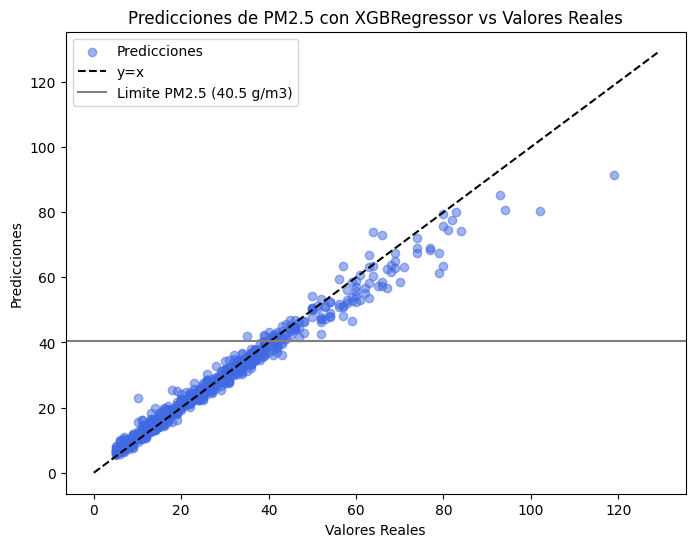

In [123]:
df_plot = xgb_pred_pm25.toPandas()

plt.figure(figsize=(8,6))
plt.scatter(
    df_plot['PM2_5'],df_plot['prediction'],color='royalblue',
    alpha=0.5,label='Predicciones')
plt.plot(
    [0,max(df_plot['PM2_5'])+10],[0,max(df_plot['PM2_5'])+10],
    color='black',linestyle='--',label='y=x')
plt.axhline(y=40.5,color='grey',
            linestyle='-',label='Limite PM2.5 (40.5 g/m3)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones de PM2.5 con XGBRegressor vs Valores Reales')
plt.legend()
plt.show()

In [124]:
# Variables
features_col =  ['Month','Day','WeekDay','Hour','CO','NO','NO2','NOX','O3',
                 'PM10','PRS','RAINF','RH','SR','TOUT', 'WSR','WDV']
# Agregar lag features e interacciones
for lag_i in range(1, 6):
    features_col += [f"PM2_5_lag{lag_i}", f"PM10_lag{lag_i}"]

features_col += ["PM10_PM2_5_ratio", "NO2_NOX_ratio"]

assembler = VectorAssembler(inputCols = features_col,outputCol='features')
data = assembler.transform(df).select('features','PM2_5')

# Separación de datos de entrenamiento y prueba
train_data, test_data = data.randomSplit([0.8,0.2],seed=42)

xgb = SparkXGBRegressor(
    features_col='features',
    label_col='PM2_5',
    num_workers=2,
    max_depth=5,
    n_estimators=100,
    learning_rate=0.1,
    seed=42)

# Pipeline
pipeline = Pipeline(stages=[assembler, xgb])

# Train/est del df original
train_data, test_data = df.randomSplit([0.8,0.2])

# Entrenar
xgb_model = pipeline.fit(train_data)

# Booster
booster = xgb_model.stages[-1].get_booster()

# Obtener importancia
feat_imp_xgb = booster.get_score(importance_type='weight')

print(feat_imp_xgb)


INFO:XGBoost-PySpark:Running xgboost-3.0.5 on 2 workers with
	booster params: {'objective': 'reg:squarederror', 'device': 'cpu', 'learning_rate': 0.1, 'max_depth': 5, 'seed': 42, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!


{'f0': 40.0, 'f1': 59.0, 'f2': 36.0, 'f3': 59.0, 'f4': 57.0, 'f5': 42.0, 'f6': 33.0, 'f7': 32.0, 'f8': 38.0, 'f9': 793.0, 'f10': 55.0, 'f11': 3.0, 'f12': 56.0, 'f13': 10.0, 'f14': 30.0, 'f15': 18.0, 'f16': 51.0, 'f17': 60.0, 'f18': 48.0, 'f19': 53.0, 'f20': 20.0, 'f21': 39.0, 'f22': 23.0, 'f23': 42.0, 'f24': 30.0, 'f25': 29.0, 'f26': 19.0, 'f27': 823.0, 'f28': 43.0}


In [125]:
# Diccionario que mapea los índices a los nombres de las característiccas
index_to_feature = {f'f{i}': feature for i, feature in enumerate(features_col)}

# Mapear puntuaciones de importancia a los nombres de las característias
feat_imp_named = {index_to_feature[k]: v for k,v in feat_imp_xgb.items()}

# Ordenar por importancia
sorted_feat_imp = sorted(feat_imp_named.items(), key=lambda x: x[1], reverse=True)
sorted_feat_imp_df = pd.DataFrame(sorted_feat_imp,columns=['Feature','Importance'])
sorted_feat_imp_df

,Feature,Importance
0,PM10_PM2_5_ratio,823.0
1,PM10,793.0
2,PM2_5_lag1,60.0
3,Day,59.0
4,Hour,59.0
5,CO,57.0
6,RH,56.0
7,PRS,55.0
8,PM2_5_lag2,53.0
9,WDV,51.0


/tmp/ipython-input-950453468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


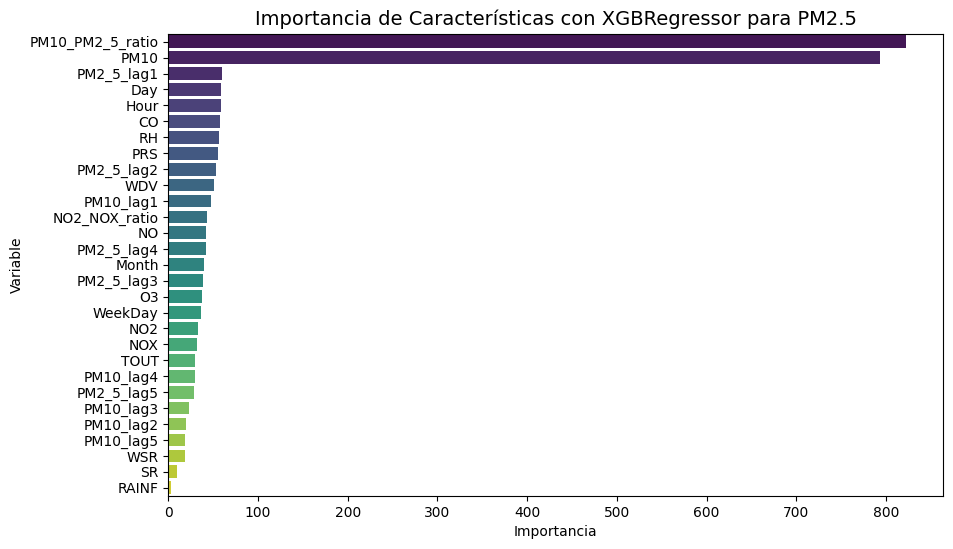

In [126]:
# Graficar Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(
    data = sorted_feat_imp_df,
    x = 'Importance',
    y = 'Feature',
    palette = 'viridis'
)

plt.title('Importancia de Características con XGBRegressor para PM2.5',
          fontsize=14)
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

Por lo tanto, las variables más importantes para el modelo XGBRegressor para la predicciónd de PM2.5 son:
1. PM10
2. Proporción entre PM10 y PM2.5
3. Día
4. Hora
5. Dirección del Viento
6. PM2.5 del día del anterior

## 3. Evalúa los modelos

### 3.1 Evaluación de Modelos para O3

#### 3.1.1 Evaluación Regresión Lineal

In [127]:
from pyspark.ml.evaluation import RegressionEvaluator
# Evaluación
evaluator = RegressionEvaluator(
    labelCol='O3',
    predictionCol='prediction',
    metricName='rmse')

rmse = evaluator.evaluate(lr_predictions_O3,{evaluator.metricName: 'rmse'})
print(f'RMSE: {rmse}')
r2 = evaluator.evaluate(lr_predictions_O3,{evaluator.metricName: 'r2'})
print(f'R2: {r2}')
mae = evaluator.evaluate(lr_predictions_O3,{evaluator.metricName: 'mae'})
print(f'MAE : {mae}')

RMSE: 9.63993543075899
R2: 0.6795279168159358
MAE : 6.995278041515562


#### 3.1.2 Evaluación RandomForestRegressor

In [128]:
# Evaluación
evaluator = RegressionEvaluator(
    labelCol='O3',
    predictionCol='prediction',
    metricName='rmse')
rmse = evaluator.evaluate(rfr_pred_o3,{evaluator.metricName: 'rmse'})
print(f'RMSE: {rmse}')
r2 = evaluator.evaluate(rfr_pred_o3,{evaluator.metricName: 'r2'})
print(f'R2: {r2}')
mae = evaluator.evaluate(rfr_pred_o3,{evaluator.metricName: 'mae'})
print(f'MAE : {mae}')

RMSE: 8.235700233536297
R2: 0.766093109963784
MAE : 5.89103928974127


#### 3.1.4 Evaluación XGBRegressor

In [129]:

# Evaluación
evaluator = RegressionEvaluator(
    labelCol='O3',
    predictionCol='prediction',
    metricName='rmse')
rmse = evaluator.evaluate(xgb_pred_o3,{evaluator.metricName: 'rmse'})
print(f'RMSE: {rmse}')
r2 = evaluator.evaluate(xgb_pred_o3,{evaluator.metricName: 'r2'})
print(f'R2: {r2}')
mae = evaluator.evaluate(xgb_pred_o3,{evaluator.metricName: 'mae'})
print(f'MAE : {mae}')

RMSE: 5.5467703167905595
R2: 0.8938983056916304
MAE : 3.885993199368401


### 3.2 Evaluación de Modelos para PM2.5

#### 3.2.1 Evaluación Regresión Lineal

In [130]:
# Evaluación
evaluator = RegressionEvaluator(
    labelCol='PM2_5',
    predictionCol='prediction',
    metricName='rmse')
rmse = evaluator.evaluate(lr_predictions_pm25,{evaluator.metricName: 'rmse'})
print(f'RMSE: {rmse}')
r2 = evaluator.evaluate(lr_predictions_pm25,{evaluator.metricName: 'r2'})
print(f'R2: {r2}')
mae = evaluator.evaluate(lr_predictions_pm25,{evaluator.metricName: 'mae'})
print(f'MAE : {mae}')

RMSE: 13.43391272214848
R2: 0.3696762945596175
MAE : 10.387623384456845


#### 3.2.2 Evaluación Random Forest Regresor

In [131]:
# Evaluación
evaluator = RegressionEvaluator(
    labelCol='PM2_5',
    predictionCol='prediction',
    metricName='rmse')
rmse = evaluator.evaluate(rfr_pred_pm25,{evaluator.metricName: 'rmse'})
print(f'RMSE: {rmse}')
r2 = evaluator.evaluate(rfr_pred_pm25,{evaluator.metricName: 'r2'})
print(f'R2: {r2}')
mae = evaluator.evaluate(rfr_pred_pm25,{evaluator.metricName: 'mae'})
print(f'MAE : {mae}')

RMSE: 4.764343929769405
R2: 0.923785984570178
MAE : 2.768986450181309


#### 3.2.4 Evaluación XGBRegressor

In [132]:
# Evaluación
evaluator = RegressionEvaluator(
    labelCol='PM2_5',
    predictionCol='prediction',
    metricName='rmse')
rmse = evaluator.evaluate(xgb_pred_pm25,{evaluator.metricName: 'rmse'})
print(f'RMSE: {rmse}')
r2 = evaluator.evaluate(xgb_pred_pm25,{evaluator.metricName: 'r2'})
print(f'R2: {r2}')
mae = evaluator.evaluate(xgb_pred_pm25,{evaluator.metricName: 'mae'})
print(f'MAE : {mae}')

RMSE: 3.0809996566861595
R2: 0.9681278079538671
MAE : 1.8927167808660403


## 4. Desarrolla tus conclusiones a partir de los resultados obtenidos

1. **Diferencias entre el comportamiento de O3 y PM2.5**
- Los modelos predictivos muestran que O3 se explica mejor con XGBRegressor.
- El ozono depende más de relaciones directas con variables metereológicas y precursos, como NO, radiación solar y temperatura, mientras que PM2.5 tiene una dinámica más complejo.

2. **Influencia del tráfico vehicular**

- La importancia relativa de conntamientas como NO2, NO y CO confirma que el tráfico vehicular es un factor relevante, especialmente en la formación de O3, y parcialmente de PM2.5
- Para los PM2.5 los modelos muestran que la relación con PM10 y sus rezagos es mucho más fuerte, lo que apunta no solo al tráfico, sino también a procesos de resuspensión, industria y condiciones metereológicas.

3. **Pronóstico de contigencias ambientales**

- A partir de un reporte meteorológico temprano, los modelos permiten anticipar si existen condiciones que favorecen la acumulación de contaminantes y riesgo de contingencia.